In [ ]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

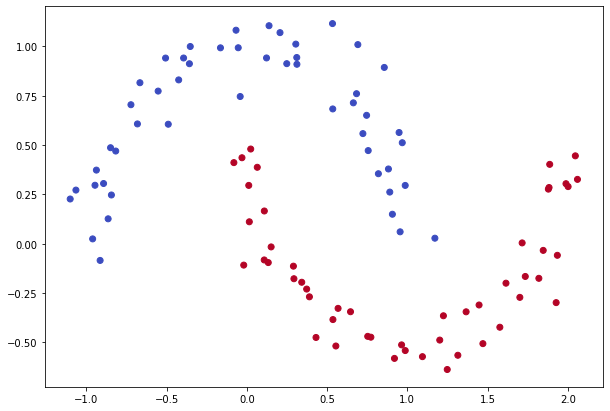

In [ ]:
np.random.seed(0)
X, y = datasets.make_moons(100, noise=0.10)
x1 = X[:,0]
x2 = X[:,1]

plt.figure(figsize=(10,7))
plt.scatter(x1, x2, c= y, cmap=plt.cm.coolwarm)
plt.show()

In [ ]:
y = y.reshape(y.shape[0],1)
print(X.shape)
print(y.shape)

(100, 2)
(100, 1)


In [ ]:
def define_parameters(weights) :
    weight_list = []
    bias_list = []
    for i in range(len(weights) - 1) :

      w = np.random.randn(weights[i], weights[i+1])
      b = np.random.randn()

      weight_list.append(w)
      bias_list.append(b)

    return weight_list, bias_list

In [ ]:
def sigmoid(x) :
  return 1/(1+np.exp(-x))

In [ ]:
def sigmoid_def(x) :
  return sigmoid(x * (1 - sigmoid(x)))

In [ ]:
def predictions(w, b, X):
  zh = np.dot(X,w[0]) + b[0]
  ah = sigmoid(zh)

  zo = np.dot(ah, w[1] + b[1])
  ao = sigmoid(zo)
  return ao

In [ ]:
def find_cost(ao,y):
  m = y.shape[0]
  total_cost = (1/m) * np.sum(np.square(ao - y))
  return total_cost

In [ ]:
def find_derivatives(w, b, X):

  zh = np.dot(X,w[0] + b[0])
  ah = sigmoid(zh)

  zo = np.dot(ah, w[1]) + b[1]
  ao = sigmoid(zo)

  # Backpropagation phase 1
  m = y.shape[0]
  dcost_dao = (1/m)*(ao-y)
  dao_dzo = sigmoid_def(zo)
  dzo_dwo = ah.T

  dwo = np.dot(dzo_dwo, dcost_dao * dao_dzo)
  dbo = np.sum(dcost_dao * dao_dzo)

  # Backpropagation phase 2

  # dcost_wh = dcost_dah * dzh * dzh_dwh
  # dcost_dah = dcost_dzo * dzo_dah

  dcost_dzo = dcost_dao * dao_dzo
  dzo_dah = w[1].T

  dcost_dah = np.dot(dcost_dzo , dzo_dah)

  dah_dzh = sigmoid_def(zh)
  dzh_dwh = X.T
  dwh = np.dot(dzh_dwh, dah_dzh * dcost_dah)
  dbh = np.sum(dah_dzh * dcost_dah)

  return dwh, dbh, dwo, dbo

In [ ]:
def update_weights(w,b,dwh, dbh, dwo, dbo, lr):
  w[0] = w[0] - lr * dwh
  w[1] = w[1] - lr * dwo

  b[0] = b[0] - lr * dbh
  b[1] = b[1] - lr * dbo

  return w, b

In [ ]:
def my_neual_network(X, y, lr, epochs):
  error_list = []
  input_len = X.shape[1]
  output_len = y.shape[1]
  w,b = define_parameters([input_len, 4 , output_len])

  for i in range(epochs):
    ao = predictions(w, b, X)
    cost = find_cost(ao, y)
    error_list.append(cost)
    dwh, dbh, dwo, dbo = find_derivatives(w, b, X)
    w, b = update_weights(w, b ,dwh, dbh, dwo, dbo, lr)

    if i % 50 == 0:
      print(cost)

  return w, b, error_list


In [ ]:
lr = 0.5
epochs = 2000
w, b, error_list = my_neual_network(X,y,lr,epochs)

0.28994790887288946
0.21093152258850478
0.1628066106425954
0.13989547368243777
0.1329602976548439
0.12848122811310786
0.12530085106893452
0.12303575899100203
0.12141919348317305
0.12025835192153922
0.11941903177987585
0.11880875052129772
0.1183629083086781
0.11803536315437864
0.11779250153293168
0.11760952252408156
0.11746799136378243
0.1173541173894282
0.11725748412244469
0.11717010409592163
0.11708573320745252
0.11699939998519732
0.11690710994854345
0.11680568680616292
0.11669271497052176
0.11656655219617232
0.11642638613286022
0.11627231325314118
0.11610542243310032
0.11592786836417546
0.11574292220865388
0.11555498889023928
0.11536958255352206
0.11519325435586915
0.11503347003133124
0.11489843854985139
0.1147968974514996
0.11473786467023861
0.1147303703873549
0.11478318517681238


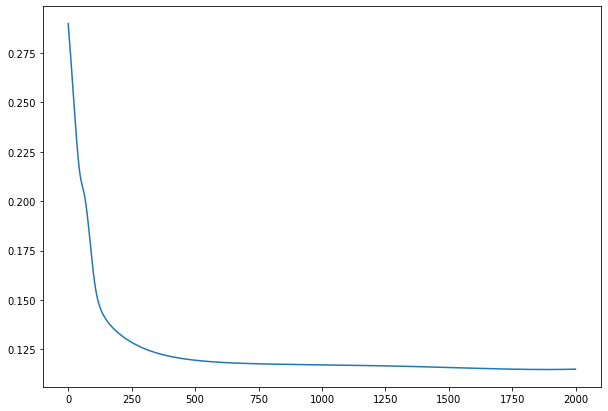

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(error_list,)
plt.show()

In [ ]:
print(b)

[-2.024942080285475, -2.563378526989857]


In [ ]:
single_point = np.array([0.5, 0.5])
result = predictions(w, b, single_point)

print(result)

[0.40444877]
